In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Downloads/student/customer_data.csv")
df.head()      # this wwill give the first 5 rows from the file.
df.info()      # This will give the data types and null data present in the data set.
df.shape       # This will give the exact  number of rows and columns present in the file.
df.describe()  # This describes the data set like count=Number of non-null values,mean=Gives the mean of the columns,std = give the standard deviation of the columns,In mean there will be the smalles value from the whole row, likewise 25%,50%,75% contain the values that are coreesponding to them,and max will give the maximum value from all the rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      400 non-null    int64
 1   Age             400 non-null    int64
 2   Annual Income   400 non-null    int64
 3   Spending Score  400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


,CustomerID,Age,Annual Income,Spending Score
count,400.000000,400.000000,400.000000,400.000000
mean,200.500000,43.987500,80433.295000,48.407500
std,115.614301,14.966373,39127.584258,28.522364
min,1.000000,18.000000,15404.000000,1.000000
25%,100.750000,32.000000,43192.250000,25.000000
50%,200.500000,45.000000,81121.500000,49.000000
75%,300.250000,56.000000,115571.000000,72.000000
max,400.000000,69.000000,149415.000000,99.000000


In [5]:
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income", "Spending Score"]]

scaler = StandardScaler()            # This object knows how to standardize data.
X_scaled = scaler.fit_transform(X)   # Fit will calculate the two things 1-Mean of each column,2-Standard deviation of each column.
# this will return a numpy Array.
print(X_scaled)


[[ 0.80363784  0.98040006 -0.36534608]
 [ 1.67333957 -0.73703414  1.77600493]
 [ 0.13463652  0.19339732 -1.17274072]
 ...
 [-0.13296401 -0.68567617  1.53027613]
 [ 1.00433824  0.04180557 -1.41846952]
 [ 0.26843678  1.34599616 -0.50576254]]


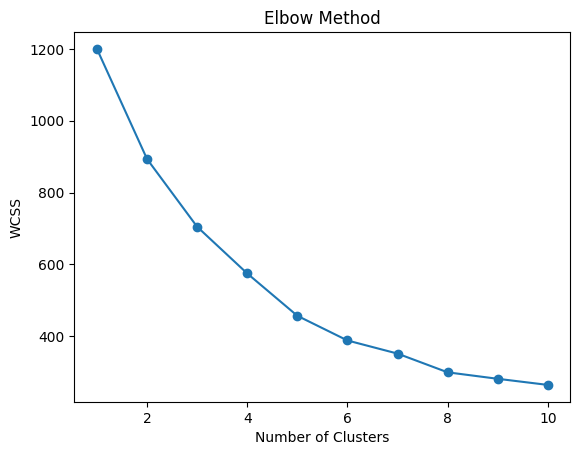

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []   # Create an empty list to store WCSS values,WCSS = Within-Cluster Sum of Squares

for i in range(1, 11): # We are testing different numbers of clusters through loops
    kmeans = KMeans(n_clusters=i, random_state=42)    # Create a KMeans model with 'i' clusters,random_state ensures reproducible results.
    kmeans.fit(X_scaled)              # The model groups customers into 'i' clusters
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')     # Plot number of clusters vs WCSS
plt.title("Elbow Method")    # Add title to the graph
plt.xlabel("Number of Clusters")   # Label X-axis as number of clusters
plt.ylabel("WCSS")              # Label Y-axis as WCSS
plt.show()      # Display the plot

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


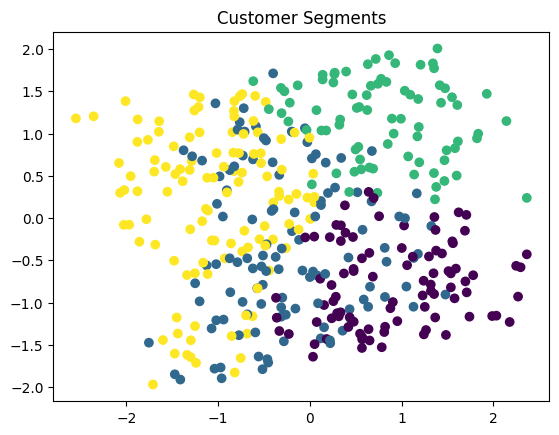

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)       # here the pca will convert the data into 2 dimension as 2d graph is easy to read on screen.
X_pca = pca.fit_transform(X_scaled)   # the fit_transform will do 2 things 1-Finds directions where data varies most. 2-It converts our original 3 features into 2 new features.

plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap='viridis')  # these will add x-axis values and y-axis values and also add colours.
plt.title("Customer Segments")  # it will give the title.
plt.show()


In [11]:
df.groupby("Cluster")[["Age","Annual Income","Spending Score"]].mean()   # this will give the mean of the given data from clustered data.


,Age,Annual Income,Spending Score
Cluster,,,
0,42.758242,43746.395604,75.219780
1,36.400000,67256.234783,20.973913
2,34.012500,118474.437500,70.437500
3,59.622807,96315.561404,39.219298
